In [ ]:
'''Run some examples with PLY format. Mostly for exporting to OBJ And re-import to check if the output is OK'''

In [2]:
from pytorch3d.io import load_obj, save_obj, load_ply,load_objs_as_meshes
import trimesh
import numpy as np
import torch
import sys
import os
from pathlib import Path
sys.path.append("../")
from rendererClass import RendererClass
import json
import itertools
from loguru import logger
from pytorch3d.io import IO
from pytorch3d.io import load_obj, load_ply
import matplotlib.pyplot as plt
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    FoVOrthographicCameras,
    Materials,
    RasterizationSettings,
    PointLights,
    
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    TexturesVertex,
    TexturesAtlas,
    PointsRenderer,
    PointsRasterizationSettings,
    HardPhongShader,
    PointsRasterizer
)

In [3]:
param_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/params_inference.json"
with open(param_path) as f:
    params = json.load(f)

device = "cuda:0"
#load the pars to render 3D
all_dist = params["camera_dist"]
all_elev = params["elevation"]
all_azim = params["azim_angle"]

#get all combinations
all_combs =  list(itertools.product(*[all_dist,all_elev,all_azim]))

# Pytorch3D

In [2]:
bed_ply_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Bed/Single_Bed.ply"
s3dis_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/S3DIS_examples/Area_3_conferenceRoom_1.ply"
bedroom_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Several_format/bed_room/untitled.obj"

tiger_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Several_format/tiger/Golden Tiger.ply"
tiger_path_obj = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Several_format/tiger/PLY_to_OBJ.obj"
body_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Several_format/full_body_scan/Full body PLY/full_body.ply"

In [3]:
liberty_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Liberty/object.obj"

In [168]:
io = IO()
mesh = io.load_mesh(tiger_path_obj, device = "cuda:0")
#mesh = load_objs_as_meshes([tiger_path_obj], device = "cuda:0")

# Trimesh 

## PLY to OBJ

In [2]:
bed_ply_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Bed/Single_Bed.ply"
bedroom_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Several_format/full_body_scan/Full body PLY/full_body.ply"
tiger_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Several_format/tiger/Golden Tiger.ply"
bed_scene = trimesh.load(tiger_path, fix_texture = True, prefer_color = "faces")


In [5]:


bed_scene.export(os.path.join(Path(tiger_path).parent.absolute(),'PLY_to_OBJ.obj'))
scene_obj = trimesh.load(os.path.join(Path(tiger_path).parent.absolute(),'PLY_to_OBJ.obj'), process=False,maintain_order=True)

In [9]:
# load with pytorch3D for the colors

verts, faces, aux = load_obj(
            os.path.join(Path(tiger_path).parent.absolute(),'PLY_to_OBJ.obj'),
            device="cpu",
            load_textures=True
            )

In [12]:
faces

Faces(verts_idx=tensor([[924052, 944825, 564315],
        [564315, 944825, 108727],
        [961701, 108727, 944825],
        ...,
        [482205, 708793, 820548],
        [501140, 781463, 526029],
        [541915, 541916,  90024]]), normals_idx=tensor([[-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1],
        ...,
        [-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1]]), textures_idx=tensor([[-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1],
        ...,
        [-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1]]), materials_idx=tensor([-1, -1, -1,  ..., -1, -1, -1]))

## Directly use them 

In [89]:
#REFERENCE: https://github.com/facebookresearch/pytorch3d/issues/468

bed_ply_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Bed/Single_Bed.ply"
bed_scene = trimesh.load(bed_ply_path)
bed_scene

np_vertices = np.array(bed_scene.vertices)
np_faces = np.array(bed_scene.faces)

verts = torch.from_numpy(np.array(np_vertices, dtype='float32'))[None][0]
faces = torch.from_numpy(np.array(np_faces,dtype='int64'))[None][0]
features = torch.from_numpy(np.array(conference_room.visual.vertex_colors,dtype='float32')[:,0:3])[None][0]


tex = TexturesVertex(verts_features=features)

ValueError: Expected verts_features to be of shape (N, V, C); got 'torch.Size([1266990, 3])'

# PLY with colors

In [ ]:
'''
There are several cases where the PLY has colors but when we import it with pytorch3D it does not import the colors
For that reason we will import it with trimesh and get the colors

'''

In [4]:
tiger_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Several_format/tiger/Golden Tiger.ply"
tiger_path_obj = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Several_format/tiger/PLY_to_OBJ.obj"
liberty_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Liberty/object.obj"
astronaunt_obj = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Astronaut/GLB_to_OBJ_force_scene.obj"

In [12]:
tiger_obj = trimesh.load(tiger_path,process = False)

verts, faces, aux = load_obj(
    tiger_path_obj,
    device="cpu",
    load_textures=True
    )

In [13]:


verts = verts.to(device)
faces_idx = faces.verts_idx.to(device) 

# normalize and center the mesh
verts = RendererClass(params).pre_process(verts)

# ------ Create a non-textured mesh -----------
mesh = Meshes(
        verts=[verts],
        faces=[faces_idx])

normalize the input in a unit shpere


In [121]:
obj_visual  = getattr(tiger_obj, "visual", None)

#if the attribute exists then get the colors
if obj_visual is not None:
    features = torch.from_numpy(np.array(tiger_obj.visual.vertex_colors[:,0:3]/255))[None]
    mesh.textures =  TexturesVertex(verts_features=features.float()).to(device)
    logger.info(f"Working with RGB colors")
    
#else get grayscale colors
else:
    logger.info(f"Working with random/grayscale texture")
    color = torch.ones(1, mesh.verts_list()[0].shape[0], 3, device=device)
    mesh.textures = TexturesVertex(verts_features=color)

2022-02-23 10:36:20.580 | INFO     | __main__:<module>:7 - Working with random/grayscale texture


In [122]:
param_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/params_inference.json"
with open(param_path) as f:
    params = json.load(f)

device = "cuda:0"
#load the pars to render 3D
all_dist = params["camera_dist"]
all_elev = params["elevation"]
all_azim = params["azim_angle"]

#get all combinations
all_combs =  list(itertools.product(*[all_dist,all_elev,all_azim]))


dist,elev,azim = all_combs[0]
image_size = 1024

R, T = look_at_view_transform(dist=1, elev=elev, azim=azim)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)
raster_settings = RasterizationSettings(
    image_size=image_size,
    blur_radius=0.0,
    clip_barycentric_coords=True,
    faces_per_pixel=1,
)
# Initialize rasterizer by using a MeshRasterizer class
rasterizer = MeshRasterizer(
    cameras=cameras,
    raster_settings=raster_settings
)
# The textured phong shader interpolates the texture uv coordinates for
# each vertex, and samples from a texture image.
shader = HardPhongShader(device=device, cameras=cameras,lights = PointLights(device=device))

# Create a mesh renderer by composing a rasterizer and a shader
renderer = MeshRenderer(rasterizer, shader)



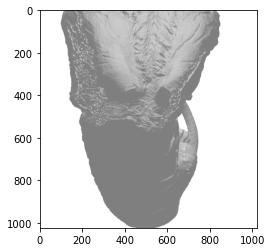

In [123]:
image = renderer(mesh)[0, ..., :3].cpu().numpy()
plt.imshow(image)
plt.show()